### 0.导入函数库

In [ ]:
from obspy.core import read
from obspy.core import UTCDateTime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

### 1.频谱计算

In [ ]:
from obspy.imaging.cm import pqlx
st = read("../data/test_trace.mseed")
tr = st[0]
st.plot(color="#5499C7", size=(620,300))
fig = tr.spectrogram(per_lap=0.8, wlen=1, dbscale=False, mult=10.0, cmap=pqlx, title="Spectrogram")

In [ ]:
from obspy.signal.tf_misfit import plot_tfr
plot_tfr(tr.data, dt=tr.stats.delta,fmin=0.2,fmax=50.)


### 奈奎斯特频率与混叠
在下面的单元格中，我们首先创建一个由两个不同频率（4 Hz和8 Hz）组成的信号，并以20 Hz的采样率进行采样（黑色）。然后，我们以两种方式将其降采样至10 Hz：首先，我们只是降低采样率（红色）；其次，在降采样之前，我们对数据进行低通滤波（绿色）。最后，将所有三种信号在时域和频域中绘制出来，以观察其效果。

```
1.原始数据和降采样数据的奈奎斯特频率分别是多少？
2.将原始数据（黑色）与纯降采样数据（红色）进行比较，你观察到了什么，能解释其中的原因吗？
3.将原始数据（黑色）与低通滤波后的降采样信号进行比较，现在你观察到了什么？
```

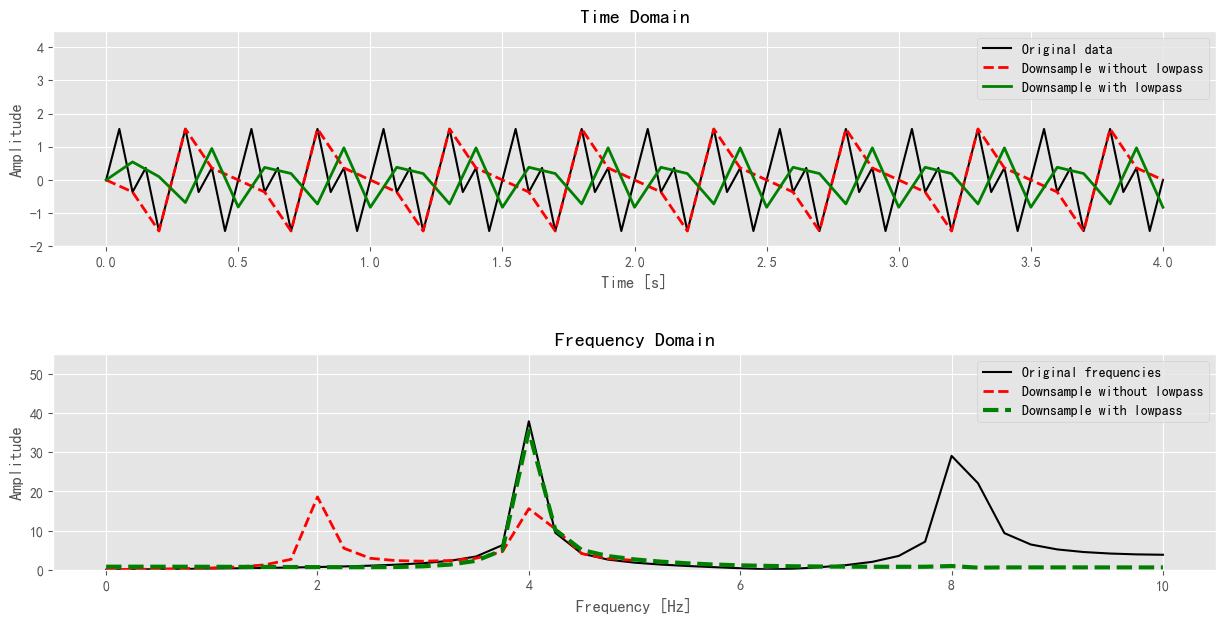

In [21]:
%matplotlib inline
import obspy
from obspy.signal.invsim import cosine_taper 
from obspy.signal.filter import lowpass
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime
from matplotlib import rcParams
import numpy as np
import matplotlib.pylab as plt

# Cell 1: downsampling + Nyquist
npts = 512                              # number of samples
nsec = 4                                # length of signal in seconds
df = 20                                 # sampling rate
fNy = df / 2.0                          # Nyquist frequency
fg1 = 8                                 # generator frequency 1 (initial: 8 Hz)
fg2 = 4                                 # generator frequency 2 (initial: 4 Hz)
time = np.linspace(0,nsec,(nsec*df)+1)  # time axis for plotting

y  = np.sin(2 * np.pi * fg1 * time)     # set up a test signal from two frequencies
y += np.sin(2 * np.pi * fg2 * time) 

# downsample to 10 Hz by taking every second element
y_2 = y[::2]

# downsample after lowpassing the signal
y_l = lowpass(y, 5.0, df=df, corners=4, zerophase=False)
y_new = y_l[::2]

y_f = np.fft.rfft(y)                    # transform all 3 signals into frequency domain 
y_f2 = np.fft.rfft(y_2)                 # applying Fourier transformation via FFT
y_fnew = np.fft.rfft(y_l)
freq = np.linspace(0, fNy, len(y_f))    # frequency axis for plotting

# plot
plt.subplot(211)
plt.plot(time, y, 'k', label="Original data", lw=1.5)
plt.plot(time[::2], y_2, 'r--', label="Downsample without lowpass", lw=2)
plt.plot(time[::2], y_new, 'g', label="Downsample with lowpass", lw=2)
plt.legend()
plt.ylim(-2, 4.5)
plt.title('Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.plot(freq, abs(y_f), 'k', label="Original frequencies", lw=1.5)
plt.plot(freq[:len(y_f2)], abs(y_f2), 'r--', label="Downsample without lowpass", lw=2)
plt.plot(freq[:len(y_fnew)], abs(y_fnew), 'g--', label="Downsample with lowpass", lw=3)
plt.legend()
plt.ylim(0, 55)
plt.title('Frequency Domain')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.show()